EDA on diamond.csv for diamond price prediction project

In [25]:
#import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Read the Dataset
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
#check for missing values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#Numerical and Categorical columns separation
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Categorical Columns : ['cut', 'color', 'clarity']


In [8]:
#Numerical Columns description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80


In [9]:
#Categorical columns Description
df[categorical_columns].describe().T

,count,unique,top,freq
cut,50000,5,Ideal,19938
color,50000,7,G,10452
clarity,50000,8,SI1,12115


In [10]:
#All unique values in dataset
df.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

In [ ]:
#ordinal features are cut, color, clarity

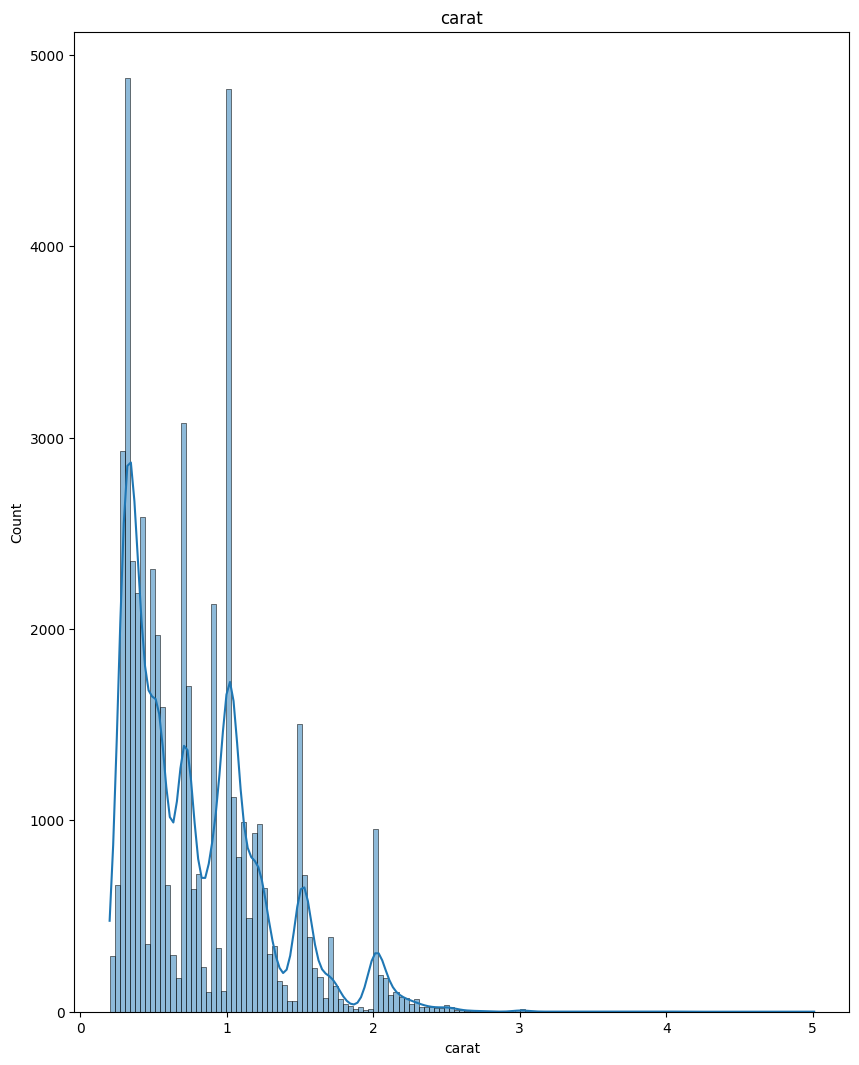

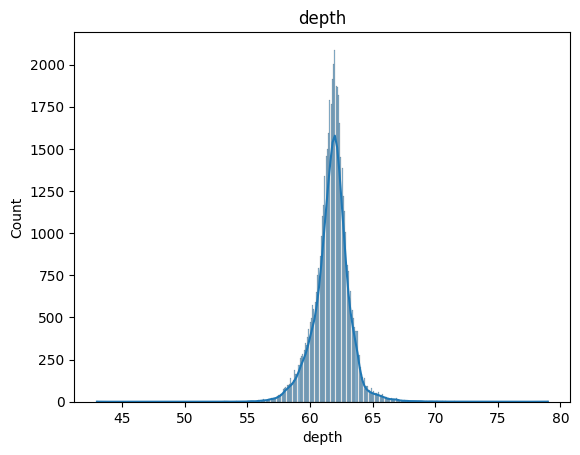

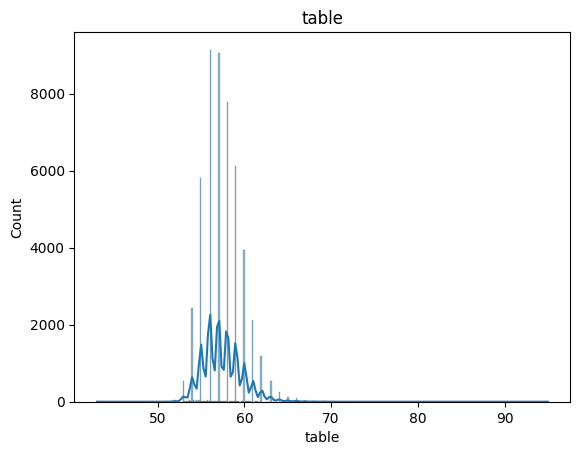

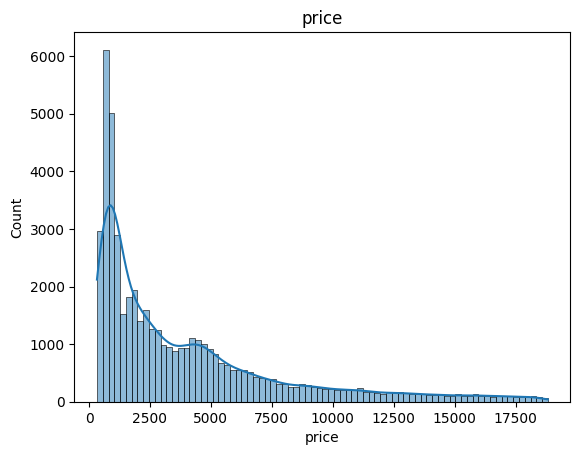

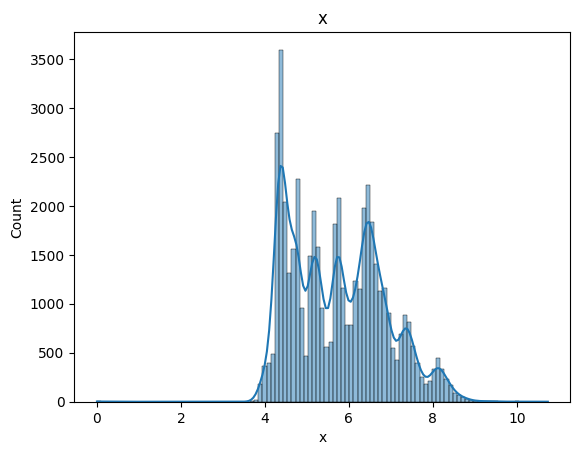

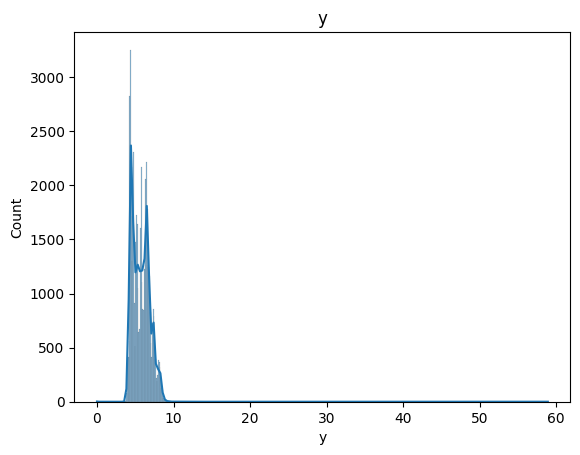

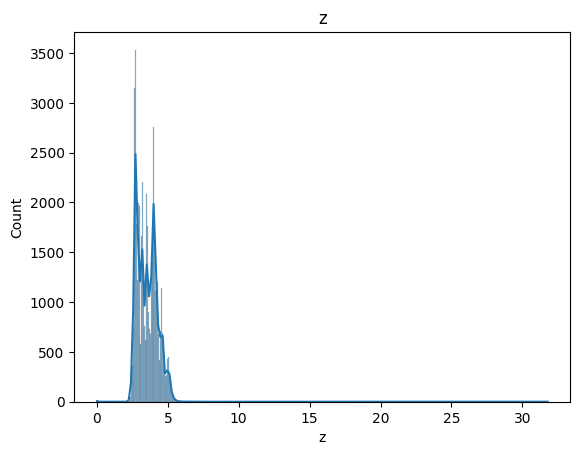

In [12]:
#Univariate Analysis of Numerical Variables
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

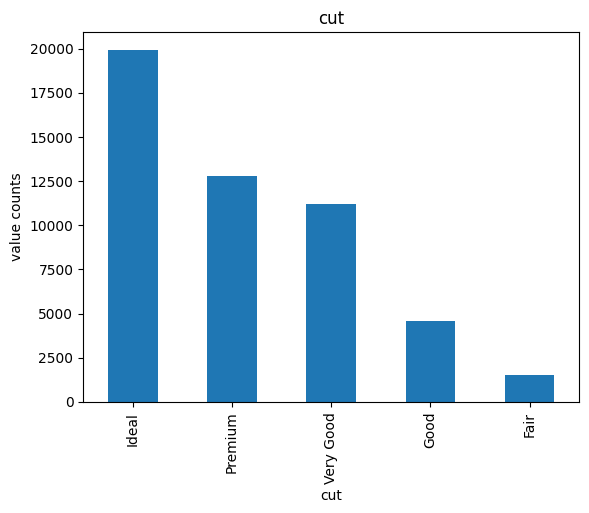

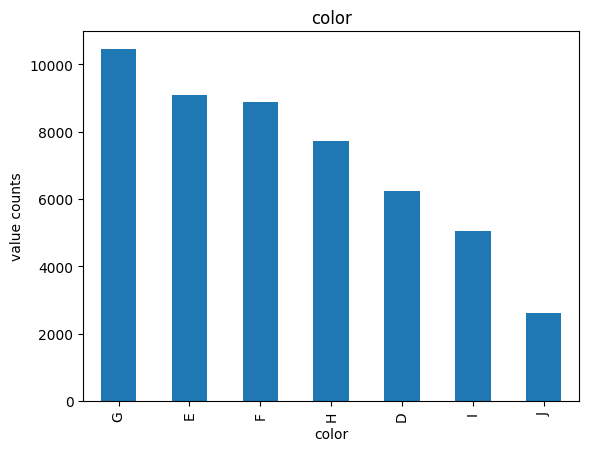

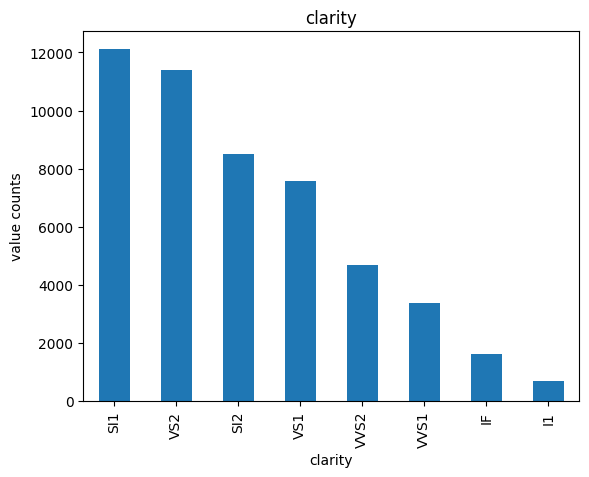

In [13]:
#Univariate Analysis of Numerical Variables
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

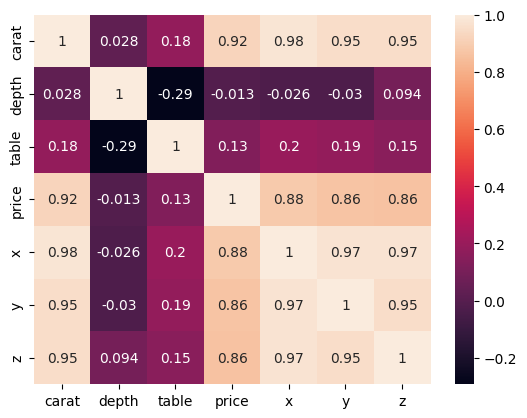

In [14]:
#Correlation heatmap
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

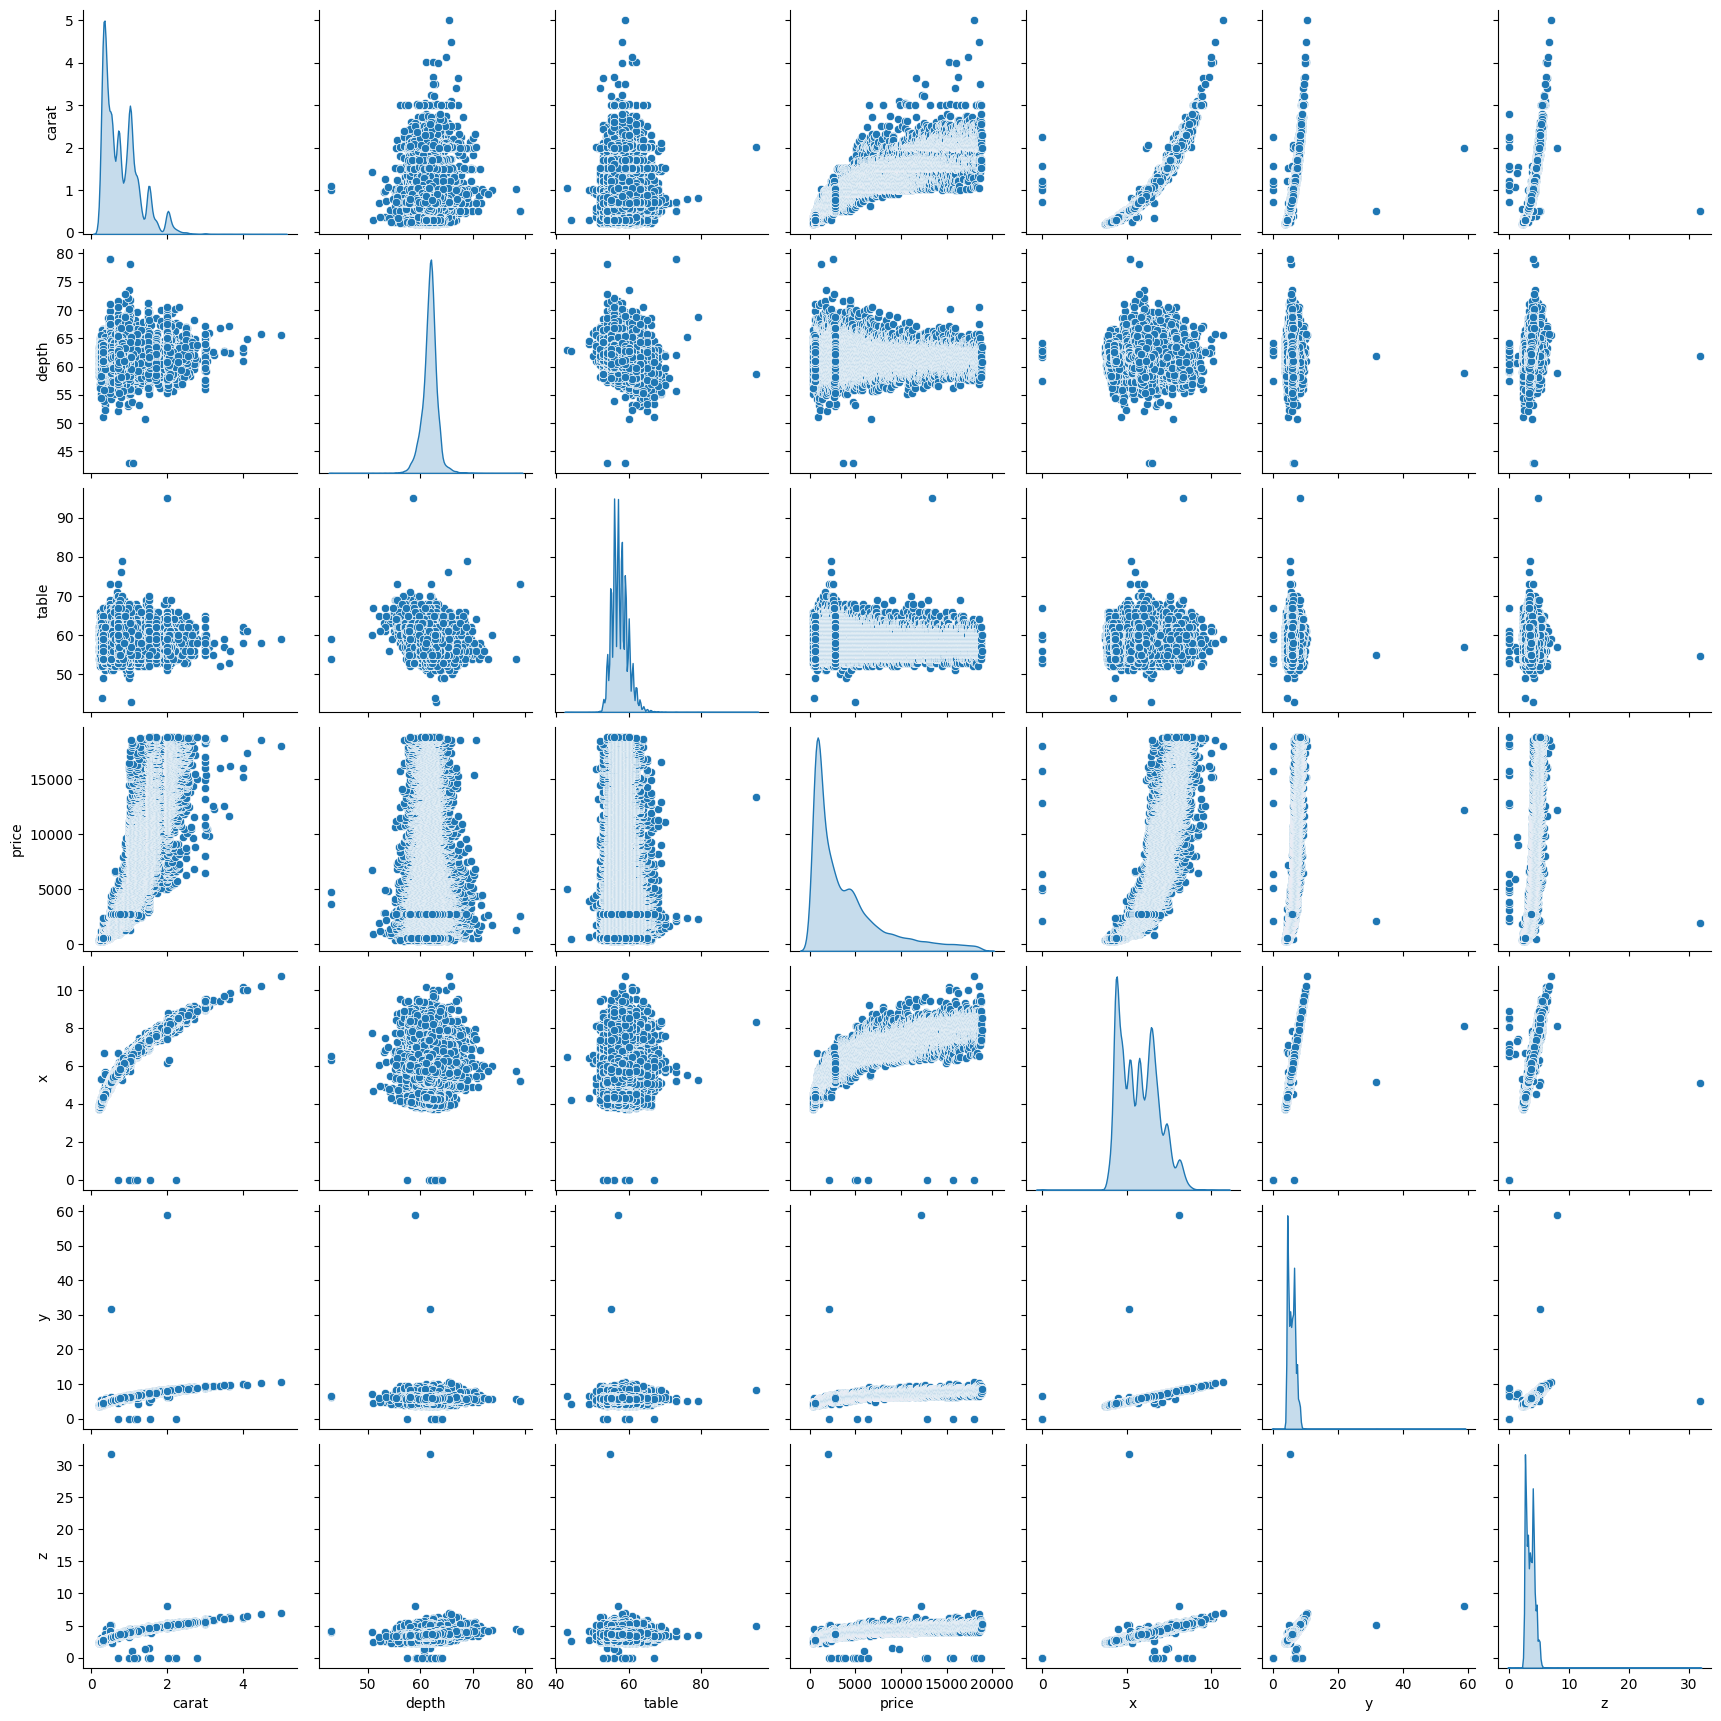

In [15]:
#Pair plot
sb.pairplot(df,diag_kind='kde')
plt.show()

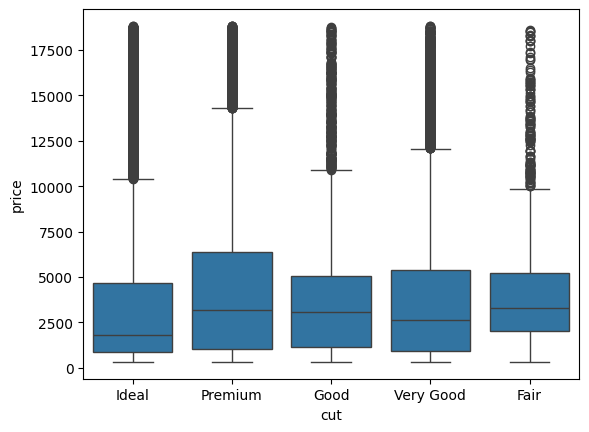

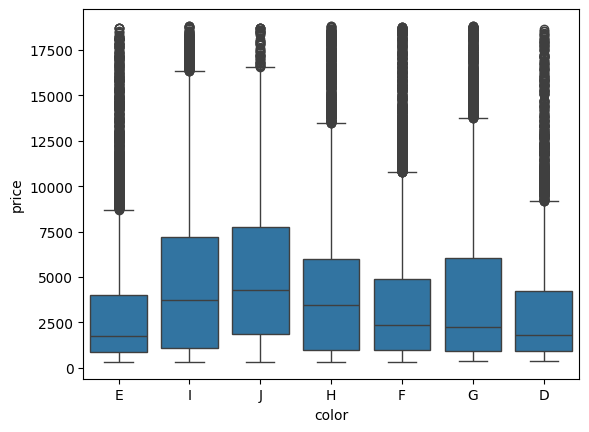

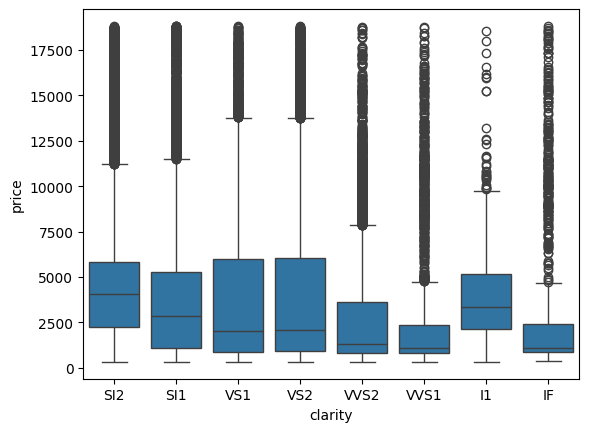

In [16]:
#boxplot between Categorical Features and Target Feature (Price)
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()

In [17]:
#Mapping of each categorical variable
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [18]:
# Applying the mapping to the dataframe
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

In [19]:
#now dataset has only numerical features
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
#split dataset into dependent and independent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [21]:
#found mutual information to check highly dependent features
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [23]:
#plot Mutual Information score

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

carat      1.951197
y          1.485714
x          1.477152
z          1.428491
clarity    0.358802
color      0.284408
cut        0.103551
table      0.051940
depth      0.035559
Name: MI Scores, dtype: float64


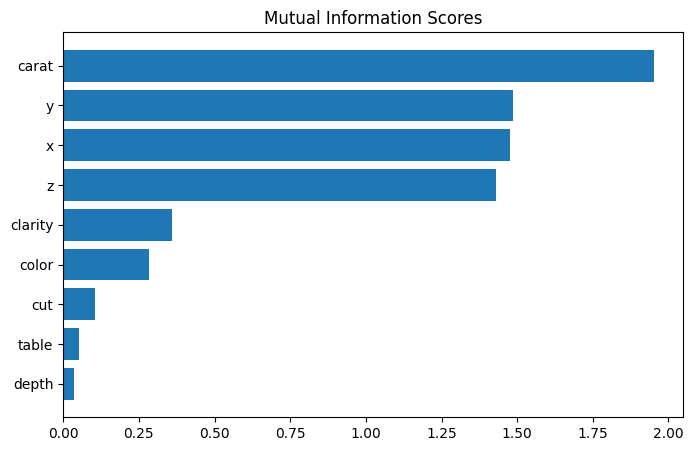

In [24]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Mutual Information shows that price of diamonds heavily depend on carat and dimensions(x,y,z) then other features